<a href="https://colab.research.google.com/github/maryam-sabet/PredictionModel_Insurance_Damage/blob/main/ML_Prediction_model_insurance_damege.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction Model For Insurance Damage With Pasargad Insurance Data**

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns;seaborn.set()
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# **Loading Dataset**

In [ ]:
Data = pd.read_excel('PASARGAD.xlsx')
Data

,کد,جنسیت,حقیقی / حقوقی,رده سنی راننده,سابقه تخفیف عدم خسارت,تعداد سال تمدید بیمه نامه,قرارداد,تخفیف خرید همه پوششهای اضافی,تخفیف پرداخت نقدی,تخفیف ویژه,...,حادثه تصادف,حادثه سرقت,حادثه شکست شیشه,مقصر بیمه گذار,تعداد خسارت,مبلغ خسارت,مبلغ حق بیمه,نسبت خسارت به حق بیمه,ارزش خودرو,سن خودرو
0,1,مرد,حقيقي,جوان,سال دوم,0,0,0,0,0,...,1,0,0,1,1,2150000,994500,2.16,75000000,2
1,2,مرد,حقيقي,جوان,سال هفتم,5,0,0,0,0,...,1,0,0,1,1,14773925,528000,27.98,60000000,6
2,3,مرد,حقيقي,جوان,سابقه ندارد,3,1,0,0,0,...,1,0,0,1,1,6846500,1028160,6.66,70000000,2
3,4,مرد,حقيقي,جوان,سابقه ندارد,2,1,0,0,0,...,1,0,0,1,3,15186500,1617600,9.39,72000000,3
4,5,مرد,حقيقي,جوان,سابقه ندارد,2,1,0,0,0,...,1,0,0,1,2,9285700,864000,10.75,55000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12269,12270,مرد,حقوقي,جوان,سال دوم,0,1,1,0,0,...,0,0,0,0,0,0,24953097,0.00,1360000000,10
12270,12271,مرد,حقوقي,جوان,سال سوم,3,0,0,0,0,...,0,0,0,0,0,0,7124520,0.00,220000000,23
12271,12272,مرد,حقوقي,جوان,سال چهارم,2,1,1,0,1,...,0,0,0,0,0,0,17376583,0.00,1550000000,5
12272,12273,مرد,حقيقي,جوان,سال دوم,2,0,1,1,1,...,1,0,0,1,2,6445455,6218944,1.04,500000000,3


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12274 entries, 0 to 12273
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   کد                            12274 non-null  int64  
 1   جنسیت                         12271 non-null  object 
 2   حقیقی / حقوقی                 12274 non-null  object 
 3   رده سنی راننده                12274 non-null  object 
 4   سابقه تخفیف عدم خسارت         12274 non-null  object 
 5   تعداد سال تمدید بیمه نامه     12274 non-null  int64  
 6   قرارداد                       12274 non-null  int64  
 7   تخفیف خرید همه پوششهای اضافی  12274 non-null  int64  
 8   تخفیف پرداخت نقدی             12274 non-null  int64  
 9   تخفیف ویژه                    12274 non-null  int64  
 10  تخفیف کارمندی                 12274 non-null  int64  
 11  تخفیف توافقی                  12274 non-null  int64  
 12  تخفیف سابقه عدم خسارت         12274 non-null  int64  
 13  و

In [ ]:
#checking missing values
Data.isnull().sum()

کد                              0
جنسیت                           3
حقیقی / حقوقی                   0
رده سنی راننده                  0
سابقه تخفیف عدم خسارت           0
تعداد سال تمدید بیمه نامه       0
قرارداد                         0
تخفیف خرید همه پوششهای اضافی    0
تخفیف پرداخت نقدی               0
تخفیف ویژه                      0
تخفیف کارمندی                   0
تخفیف توافقی                    0
تخفیف سابقه عدم خسارت           0
وسایل اضافی                     0
مورد استفاده                    0
گروه خودرو                      0
نام سیستم خودرو                 0
رنگ                             0
صفر/ غیر صفر                    0
تعداد الحاقیه اضافی             0
تعداد الحاقیه برگشتی            0
خسارت جزئی                      0
 خسارت کلی                      0
حادثه تصادف                     0
حادثه سرقت                      0
حادثه شکست شیشه                 0
مقصر بیمه گذار                  0
تعداد خسارت                     0
مبلغ خسارت                      0
مبلغ حق بیمه  

In [ ]:
#remove useless column
Data = Data.drop('کد', axis=1)
Data

,جنسیت,حقیقی / حقوقی,رده سنی راننده,سابقه تخفیف عدم خسارت,تعداد سال تمدید بیمه نامه,قرارداد,تخفیف خرید همه پوششهای اضافی,تخفیف پرداخت نقدی,تخفیف ویژه,تخفیف کارمندی,...,حادثه تصادف,حادثه سرقت,حادثه شکست شیشه,مقصر بیمه گذار,تعداد خسارت,مبلغ خسارت,مبلغ حق بیمه,نسبت خسارت به حق بیمه,ارزش خودرو,سن خودرو
0,مرد,حقيقي,جوان,سال دوم,0,0,0,0,0,0,...,1,0,0,1,1,2150000,994500,2.16,75000000,2
1,مرد,حقيقي,جوان,سال هفتم,5,0,0,0,0,0,...,1,0,0,1,1,14773925,528000,27.98,60000000,6
2,مرد,حقيقي,جوان,سابقه ندارد,3,1,0,0,0,1,...,1,0,0,1,1,6846500,1028160,6.66,70000000,2
3,مرد,حقيقي,جوان,سابقه ندارد,2,1,0,0,0,0,...,1,0,0,1,3,15186500,1617600,9.39,72000000,3
4,مرد,حقيقي,جوان,سابقه ندارد,2,1,0,0,0,0,...,1,0,0,1,2,9285700,864000,10.75,55000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12269,مرد,حقوقي,جوان,سال دوم,0,1,1,0,0,0,...,0,0,0,0,0,0,24953097,0.00,1360000000,10
12270,مرد,حقوقي,جوان,سال سوم,3,0,0,0,0,0,...,0,0,0,0,0,0,7124520,0.00,220000000,23
12271,مرد,حقوقي,جوان,سال چهارم,2,1,1,0,1,0,...,0,0,0,0,0,0,17376583,0.00,1550000000,5
12272,مرد,حقيقي,جوان,سال دوم,2,0,1,1,1,0,...,1,0,0,1,2,6445455,6218944,1.04,500000000,3


# **Encoding Object Features**

In [ ]:
LabelEncoder = LabelEncoder()

objList = Data.select_dtypes(include = "object").columns

for i in range(len(objList)):
    Data[objList[i]] = LabelEncoder.fit_transform(Data[objList[i]])

Data

,جنسیت,حقیقی / حقوقی,رده سنی راننده,سابقه تخفیف عدم خسارت,تعداد سال تمدید بیمه نامه,قرارداد,تخفیف خرید همه پوششهای اضافی,تخفیف پرداخت نقدی,تخفیف ویژه,تخفیف کارمندی,...,حادثه تصادف,حادثه سرقت,حادثه شکست شیشه,مقصر بیمه گذار,تعداد خسارت,مبلغ خسارت,مبلغ حق بیمه,نسبت خسارت به حق بیمه,ارزش خودرو,سن خودرو
0,1,1,0,1,0,0,0,0,0,0,...,1,0,0,1,1,2150000,994500,2.16,75000000,2
1,1,1,0,4,5,0,0,0,0,0,...,1,0,0,1,1,14773925,528000,27.98,60000000,6
2,1,1,0,0,3,1,0,0,0,1,...,1,0,0,1,1,6846500,1028160,6.66,70000000,2
3,1,1,0,0,2,1,0,0,0,0,...,1,0,0,1,3,15186500,1617600,9.39,72000000,3
4,1,1,0,0,2,1,0,0,0,0,...,1,0,0,1,2,9285700,864000,10.75,55000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12269,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,24953097,0.00,1360000000,10
12270,1,0,0,2,3,0,0,0,0,0,...,0,0,0,0,0,0,7124520,0.00,220000000,23
12271,1,0,0,6,2,1,1,0,1,0,...,0,0,0,0,0,0,17376583,0.00,1550000000,5
12272,1,1,0,1,2,0,1,1,1,0,...,1,0,0,1,2,6445455,6218944,1.04,500000000,3


In [ ]:
#Data.to_excel('newpasargad.xlsx')
Prepared_Data = pd.read_excel('newpasargad.xlsx')
Prepared_Data

,جنسیت,حقیقی / حقوقی,رده سنی راننده,سابقه تخفیف عدم خسارت,تعداد سال تمدید بیمه نامه,قرارداد,تخفیف خرید همه پوششهای اضافی,تخفیف پرداخت نقدی,تخفیف ویژه,تخفیف کارمندی,...,حادثه تصادف,حادثه سرقت,حادثه شکست شیشه,مقصر بیمه گذار,تعداد خسارت,مبلغ خسارت,مبلغ حق بیمه,نسبت خسارت به حق بیمه,ارزش خودرو,سن خودرو
0,1.0,1,0,1,0,0,0,0,0,0,...,1,0,0,1,1,2150000,994500,2.16,75000000,2
1,1.0,1,0,4,5,0,0,0,0,0,...,1,0,0,1,1,14773925,528000,27.98,60000000,6
2,1.0,1,0,0,3,1,0,0,0,1,...,1,0,0,1,1,6846500,1028160,6.66,70000000,2
3,1.0,1,0,0,2,1,0,0,0,0,...,1,0,0,1,3,15186500,1617600,9.39,72000000,3
4,1.0,1,0,0,2,1,0,0,0,0,...,1,0,0,1,2,9285700,864000,10.75,55000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12269,1.0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,24953097,0.00,1360000000,10
12270,1.0,0,0,2,3,0,0,0,0,0,...,0,0,0,0,0,0,7124520,0.00,220000000,23
12271,1.0,0,0,6,2,1,1,0,1,0,...,0,0,0,0,0,0,17376583,0.00,1550000000,5
12272,1.0,1,0,1,2,0,1,1,1,0,...,1,0,0,1,2,6445455,6218944,1.04,500000000,3


# **Imputing missing values with KNN**

In [ ]:
imputer = KNNImputer(n_neighbors=5, metric='nan_euclidean', weights="distance")
Prepared_Data = imputer.fit_transform(Prepared_Data)

Prepared_Data = Prepared_Data.astype(int)
PreparedData = pd.DataFrame(Prepared_Data)
PreparedData

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,1,0,1,0,0,0,0,0,0,...,1,0,0,1,1,2150000,994500,2,75000000,2
1,1,1,0,4,5,0,0,0,0,0,...,1,0,0,1,1,14773925,528000,27,60000000,6
2,1,1,0,0,3,1,0,0,0,1,...,1,0,0,1,1,6846500,1028160,6,70000000,2
3,1,1,0,0,2,1,0,0,0,0,...,1,0,0,1,3,15186500,1617600,9,72000000,3
4,1,1,0,0,2,1,0,0,0,0,...,1,0,0,1,2,9285700,864000,10,55000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12269,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,24953097,0,1360000000,10
12270,1,0,0,2,3,0,0,0,0,0,...,0,0,0,0,0,0,7124520,0,220000000,23
12271,1,0,0,6,2,1,1,0,1,0,...,0,0,0,0,0,0,17376583,0,1550000000,5
12272,1,1,0,1,2,0,1,1,1,0,...,1,0,0,1,2,6445455,6218944,1,500000000,3


In [ ]:
#changing column's titles
PreparedData.columns = ['gender','typeofperson','driverage','no-damage discount history',
                        'numberofyearsof insurance-renewal','contract','discount buy all additional coerage',
                        'cash payment discount','special discount','employee discount',
                        'negotiable discount','discount no-damage history','additional equipment',
                        'used','typeofcar','carmodel','color','carstatus','numberof additional extensions',
                        'numberof extras returend','minor damage','total damage','accident','theft',
                        'broken glass','the culprit insurer','number of damages','amount of damages',
                        'premium amount','damage to premium ratio','valueofcar','carage' ]

PreparedData

,gender,typeofperson,driverage,no-damage discount history,numberofyearsof insurance-renewal,contract,discount buy all additional coerage,cash payment discount,special discount,employee discount,...,accident,theft,broken glass,the culprit insurer,number of damages,amount of damages,premium amount,damage to premium ratio,valueofcar,carage
0,1,1,0,1,0,0,0,0,0,0,...,1,0,0,1,1,2150000,994500,2,75000000,2
1,1,1,0,4,5,0,0,0,0,0,...,1,0,0,1,1,14773925,528000,27,60000000,6
2,1,1,0,0,3,1,0,0,0,1,...,1,0,0,1,1,6846500,1028160,6,70000000,2
3,1,1,0,0,2,1,0,0,0,0,...,1,0,0,1,3,15186500,1617600,9,72000000,3
4,1,1,0,0,2,1,0,0,0,0,...,1,0,0,1,2,9285700,864000,10,55000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12269,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,24953097,0,1360000000,10
12270,1,0,0,2,3,0,0,0,0,0,...,0,0,0,0,0,0,7124520,0,220000000,23
12271,1,0,0,6,2,1,1,0,1,0,...,0,0,0,0,0,0,17376583,0,1550000000,5
12272,1,1,0,1,2,0,1,1,1,0,...,1,0,0,1,2,6445455,6218944,1,500000000,3


In [ ]:
#set right type to columns
for col in ['gender', 'typeofperson', 'driverage', 'no-damage discount history',
            'contract','discount buy all additional coerage',
            'cash payment discount','special discount','employee discount','negotiable discount',
            'discount no-damage history','additional equipment','used',
            'typeofcar','carmodel','color','carstatus','minor damage',
            'total damage','accident','theft','broken glass','the culprit insurer']:
    PreparedData[col] = PreparedData[col].astype(str)


PreparedData['damage to premium ratio'] = PreparedData['damage to premium ratio'].astype(float)

In [ ]:
PreparedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12274 entries, 0 to 12273
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               12274 non-null  object 
 1   typeofperson                         12274 non-null  object 
 2   driverage                            12274 non-null  object 
 3   no-damage discount history           12274 non-null  object 
 4   numberofyearsof insurance-renewal    12274 non-null  int32  
 5   contract                             12274 non-null  object 
 6   discount buy all additional coerage  12274 non-null  object 
 7   cash payment discount                12274 non-null  object 
 8   special discount                     12274 non-null  object 
 9   employee discount                    12274 non-null  object 
 10  negotiable discount                  12274 non-null  object 
 11  discount no-damage history  

# **Data Analysis**

gender
0     2076
1    10198
dtype: int64


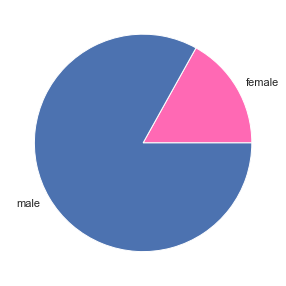

In [ ]:
print(PreparedData.groupby('gender').size())

mylabels = ["female", "male"]
mycolors = ["hotpink", "b"]

plt.figure(figsize=(5,5))
plt.pie(PreparedData.groupby('gender').size(), labels = mylabels,colors = mycolors)
plt.show()

typeofperson
0     1007
1    11267
dtype: int64


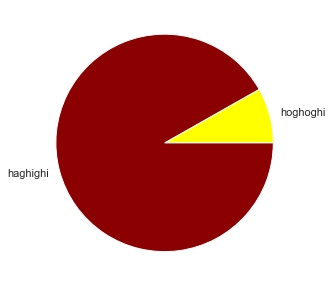

In [ ]:
print(PreparedData.groupby('typeofperson').size())

mylabels = ["hoghoghi", "haghighi"]
mycolors = ["yellow", "darkred"]

plt.figure(figsize=(5,5))
plt.pie(PreparedData.groupby('typeofperson').size(), labels = mylabels,colors = mycolors)
plt.show()

driverage
0    11677
1       32
2      565
dtype: int64


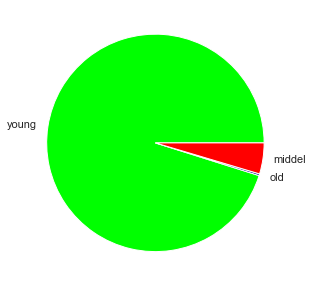

In [ ]:
print(PreparedData.groupby('driverage').size())

mylabels = ["young", "old","middel"]
mycolors = ["lime", "darkblue","red"]

plt.figure(figsize=(5,5))
plt.pie(PreparedData.groupby('driverage').size(), labels = mylabels,colors = mycolors)
plt.show()

contract
0    8113
1    4161
dtype: int64


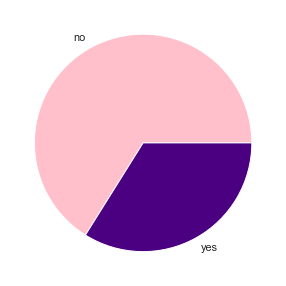

In [ ]:
print(PreparedData.groupby('contract').size())

mylabels = ["no", "yes"]
mycolors = ["pink", "indigo"]

plt.figure(figsize=(5,5))
plt.pie(PreparedData.groupby('contract').size(), labels = mylabels,colors = mycolors)
plt.show()

the culprit insurer
0    6784
1    5490
dtype: int64


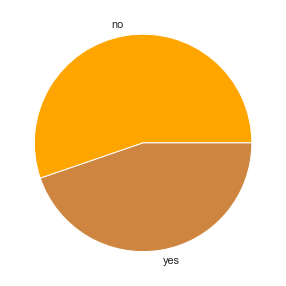

In [ ]:
print(PreparedData.groupby('the culprit insurer').size())

mylabels = ["no", "yes"]
mycolors = ["orange", "peru"]

plt.figure(figsize=(5,5))
plt.pie(PreparedData.groupby('the culprit insurer').size(), labels = mylabels,colors = mycolors)
plt.show()

<AxesSubplot:>

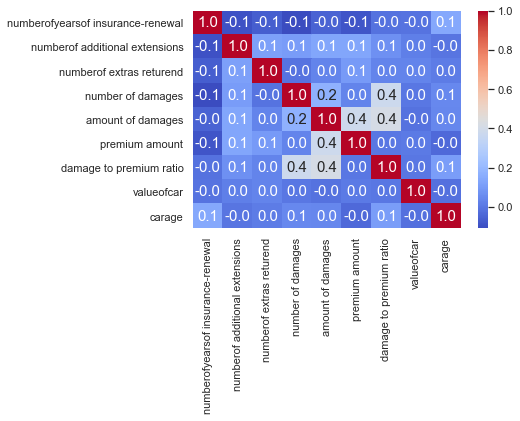

In [ ]:
sns.heatmap(PreparedData.corr(),cmap='coolwarm',annot=True,annot_kws={'size':15},fmt='.1f')

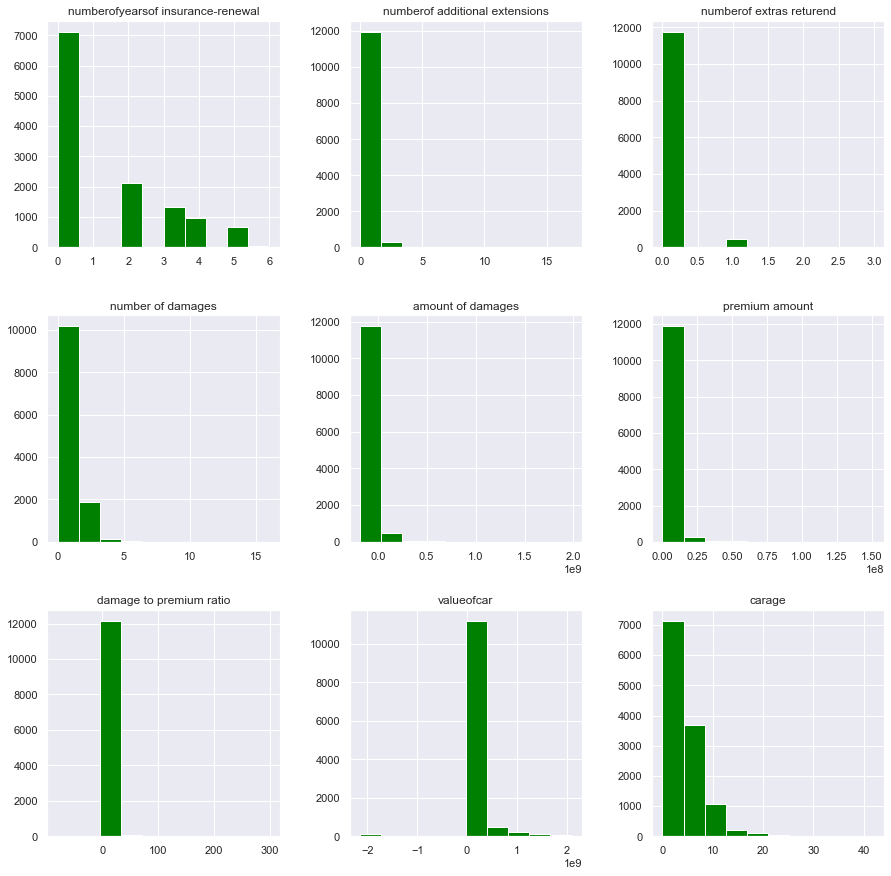

In [ ]:
PreparedData.hist(figsize=(15,15),layout=(3,3),color='green')
plt.show()

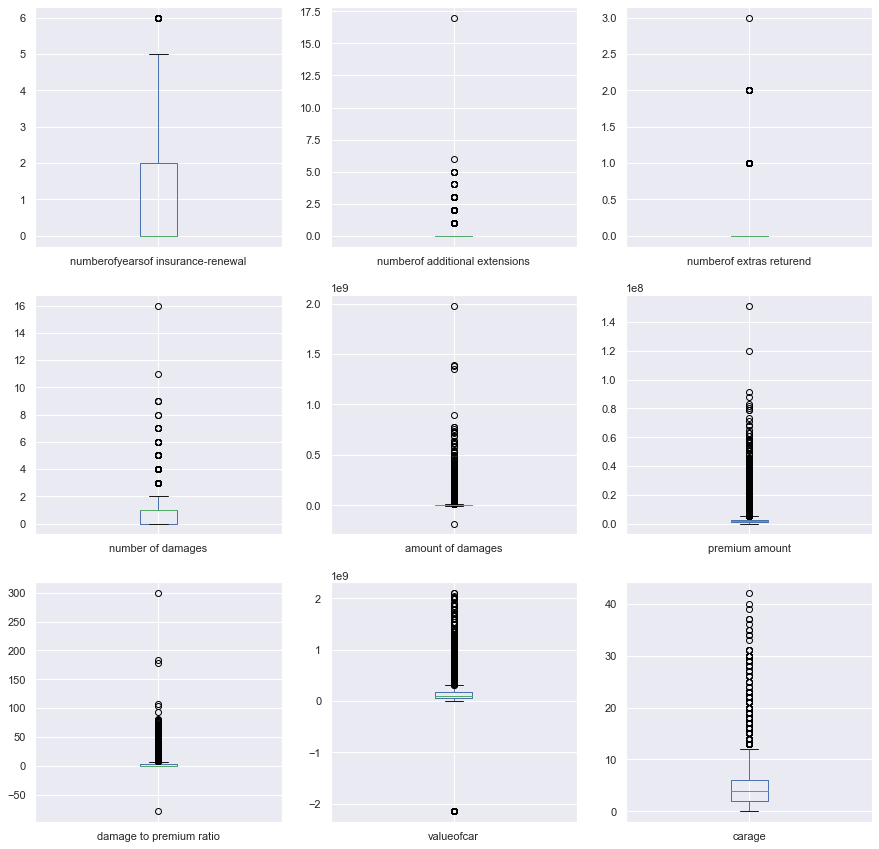

In [ ]:
PreparedData.plot(kind='box',subplots=True,layout=(3,3),figsize=(15,15))
plt.show()

# **removing two features that if they had existed , the model couldn't correctly predict because they had affected on Target Variable**

In [ ]:
PreparedData = PreparedData.drop('amount of damages', axis=1)
PreparedData = PreparedData.drop('premium amount', axis=1)
PreparedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12274 entries, 0 to 12273
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               12274 non-null  object 
 1   typeofperson                         12274 non-null  object 
 2   driverage                            12274 non-null  object 
 3   no-damage discount history           12274 non-null  object 
 4   numberofyearsof insurance-renewal    12274 non-null  int32  
 5   contract                             12274 non-null  object 
 6   discount buy all additional coerage  12274 non-null  object 
 7   cash payment discount                12274 non-null  object 
 8   special discount                     12274 non-null  object 
 9   employee discount                    12274 non-null  object 
 10  negotiable discount                  12274 non-null  object 
 11  discount no-damage history  

# **scaling with MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = np.array(PreparedData['damage to premium ratio']).reshape(-1,1)
X_scaled = scaler.fit_transform(X)
PreparedData['damage to premium ratio'] = X_scaled.reshape(1,-1)[0]

y = np.array(PreparedData['valueofcar']).reshape(-1,1)
y_scaled = scaler.fit_transform(y)
PreparedData['valueofcar'] = y_scaled.reshape(1,-1)[0]
PreparedData

,gender,typeofperson,driverage,no-damage discount history,numberofyearsof insurance-renewal,contract,discount buy all additional coerage,cash payment discount,special discount,employee discount,...,minor damage,total damage,accident,theft,broken glass,the culprit insurer,number of damages,damage to premium ratio,valueofcar,carage
0,1,1,0,1,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0.214286,0.523247,2
1,1,1,0,4,5,0,0,0,0,0,...,1,0,1,0,0,1,1,0.280423,0.519716,6
2,1,1,0,0,3,1,0,0,0,1,...,1,0,1,0,0,1,1,0.224868,0.522070,2
3,1,1,0,0,2,1,0,0,0,0,...,1,0,1,0,0,1,3,0.232804,0.522541,3
4,1,1,0,0,2,1,0,0,0,0,...,1,0,1,0,0,1,2,0.235450,0.518538,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12269,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0.208995,0.825779,10
12270,1,0,0,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0.208995,0.557385,23
12271,1,0,0,6,2,1,1,0,1,0,...,0,0,0,0,0,0,0,0.208995,0.870512,5
12272,1,1,0,1,2,0,1,1,1,0,...,1,0,1,0,0,1,2,0.211640,0.623306,3


# **split to train & test**

In [ ]:
x = PreparedData.drop('damage to premium ratio',axis=1)
y = PreparedData['damage to premium ratio']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.28,random_state=101)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8837, 29) (8837,)
(3437, 29) (3437,)


 # **Modelling And Models scores**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet, Lasso,LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import lightgbm as lgb

In [ ]:
#Validation function

n_folds = 5

def rm_se(model):

    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


In [ ]:
#KNeighborsRegressor:

neigh = make_pipeline(RobustScaler(), KNeighborsRegressor(n_neighbors=5,weights='uniform'))

score = rm_se(neigh)
print("neigh score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

neigh score: 0.0193 (0.0033)



In [ ]:
#LASSO Regression :

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

score = rm_se(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0176 (0.0036)



In [ ]:
#ElasticNet Regression :

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

score = rm_se(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0175 (0.0036)



In [ ]:
#RandomForestRegressor:

RFR = RandomForestRegressor(n_estimators = 50, max_depth = 4, n_jobs = -1, random_state=0)

score = rm_se(RFR)
print("\nRFR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


RFR score: 0.0168 (0.0033)



In [ ]:
#Gradient Boosting Regression :

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state =5)
score = rm_se(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.0164 (0.0034)



In [ ]:
#XGBoost :

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = rm_se(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[06:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:19:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:19:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false

In [ ]:
#lightgbm:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rm_se(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

# **Final  Prediction : selecting best models**

In [ ]:
#Gradient Boosting Regression :

GBoost.fit(X_train, y_train)
GBoost_pred = GBoost.predict(X_test)

print(mean_squared_error(GBoost_pred , y_test))
print(mean_absolute_error(GBoost_pred , y_test))

0.00018185248889007532
0.005012078827425949


In [ ]:
#lightgbm:

model_lgb.fit(X_train.values, y_train)
lgb_pred = model_lgb.predict(X_test.values)

print(mean_squared_error(lgb_pred , y_test))
print(mean_absolute_error(lgb_pred , y_test))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
0.00018266449841317897
0.0058972679265983634


# features score

In [ ]:
from sklearn.feature_selection import SelectKBest,f_regression

fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X_train,y_train)
X_train_fs = fs.transform(X_train)

X_test_fs = fs.transform(X_test)

for i in range(len(fs.scores_)):
    print ('Feature %d: %f' % (i,fs.scores_[i]))

Feature 0: 7.167787
Feature 1: 1.115172
Feature 2: 27.133353
Feature 3: 21.626866
Feature 4: 0.002467
Feature 5: 2.917445
Feature 6: 6.942349
Feature 7: 4.721121
Feature 8: 2.480104
Feature 9: 29.957935
Feature 10: 0.471652
Feature 11: 4.937270
Feature 12: 0.800253
Feature 13: 1.849826
Feature 14: 29.215880
Feature 15: 11.046239
Feature 16: 1.548845
Feature 17: 3.662306
Feature 18: 42.439023
Feature 19: 18.299125
Feature 20: 744.914368
Feature 21: 1719.542833
Feature 22: 1149.383505
Feature 23: 55.080148
Feature 24: 3.644383
Feature 25: 1077.348203
Feature 26: 1363.968714
Feature 27: 0.037500
Feature 28: 96.854554


# REFERENCES

https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

https://levelup.gitconnected.com/random-forest-regression-209c0f354c84

https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

https://blog.paperspace.com/implementing-gradient-boosting-regression-python/

https://blog.faradars.org/implementing-ml-algorithms-with-python/

https://virgool.io/@tarjomyarbot/%D8%AA%D9%85%D8%A7%D9%85-%D8%A7%D9%84%DA%AF%D9%88%D8%B1%DB%8C%D8%AA%D9%85-%D9%87%D8%A7%DB%8C-%DB%8C%D8%A7%D8%AF%DA%AF%DB%8C%D8%B1%DB%8C-%D9%85%D8%A7%D8%B4%DB%8C%D9%86-%DA%A9%D9%87-%D8%A8%D8%A7%DB%8C%D8%AF-%D8%AF%D8%B1-%D8%B3%D8%A7%D9%84-2021-%D8%A8%D8%AF%D8%A7%D9%86%DB%8C%D8%AF-ksz6hzgioh3q